## Unsupervised ML Python Homework

In [156]:
import numpy as np
import pandas as pd
import sklearn
import sys
import warnings
import os
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    os.environ["PYTHONWARNINGS"] = "ignore" 

import matplotlib.pyplot as plt
import seaborn as sns
import time


from sklearn.decomposition import PCA

import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

In [157]:
data = pd.read_csv('unsupervised_ml_homework_data.csv')

### Soal 1: PCA

Instruksi:
1. Lakukan PCA pada data yang telah di-import di cell atas.
2. Ketentuan PCA: Ambil sampai threshold explained variancenya 0.8 (80%)
3. Berapa Principal Components yang diambil?
4. Simpan data hasil PCA karena data hasil PCA ini akan digunakan di Soal 2: K-Means

In [158]:
#Mengetahui banyaknya components
sklearn.decomposition.PCA(data)

PCA(n_components=             0          1          2          3          4          5  \
0     3.737848  -1.646325  -7.810163  11.995504  -2.807248  -0.085124   
1    -6.024396  -0.488319   4.315504   0.650888 -14.594512  -2.801084   
2     0.490949 -10.487436  -9.045535   0.129481   3.977727  -7.615191   
3   -13.087377   7.845202  21.154323   7.971816 -13.379182   1.204298   
4    -7.171991  13.705993  11.057470  14.073451  -7.947617  -4.637308   
..         ...        ...        ...        ...        ...        ...   
995  -3.471686  12.940466   8.508031  19.4791...
997  18.516239   3.508759  -3.534441   8.934743 -15.085670  5.897779   
998  11.791521   5.684052 -12.296774 -10.716805  -4.355119 -9.737902   
999  -0.450576  -5.445609  -3.165241  -4.608183   5.482402 -8.084182   

            18         19  
0    -3.268958   2.623776  
1     0.376761  -3.531153  
2     3.365510  23.723555  
3     3.878080  12.262810  
4     5.047994   4.019611  
..         ...        ...  
995   3.43

In [159]:
# Melakukan PCA pada data yang telah di-import 
pca_80 = PCA(0.8)

In [160]:
pca_80.fit(data)
pca_80_trans = pca_80.transform(data)
data_pca_80 = pd.DataFrame(pca_80_trans)

In [161]:
# Menampilkan data yang telah dilakukan PCA
print('Tersisa:', pca_80.n_components_, 'feature columns setelah melakukan PCA.')
print('PCA kali ini berhasil mereduksi dataset sebanyak', (1-(pca_80.n_components_/20))*100, 'persen')

Tersisa: 12 feature columns setelah melakukan PCA.
PCA kali ini berhasil mereduksi dataset sebanyak 40.0 persen


In [162]:
data_pca_80

,0,1,2,3,4,5,6,7,8,9,10,11
0,4.489239,23.388822,-1.245327,-0.604663,7.168715,12.140433,-2.606712,-2.982270,-1.240097,0.661235,3.653253,1.176113
1,-16.927579,-21.720006,0.453236,-2.092276,-1.854185,8.105598,0.857659,2.890713,0.310611,-0.045326,-4.492495,4.243733
2,29.585439,-0.367065,8.009331,3.564103,3.851260,1.446380,8.451138,-9.789632,-3.855225,-1.684923,-3.405300,-8.356691
3,-18.107060,-8.676266,-0.009083,9.928400,2.647460,-2.341457,4.218565,1.104390,-2.239445,-1.504301,3.573772,-18.724099
4,-19.133698,-13.345589,-5.568956,-6.848398,-5.305273,-10.130572,-9.445192,0.368672,-7.123532,-2.462980,2.651811,-6.460466
...,...,...,...,...,...,...,...,...,...,...,...,...
995,-27.596745,-5.675153,1.037456,2.060439,12.357932,-1.168417,-5.429511,-7.116851,2.629224,-3.142956,2.621997,-0.400097
996,-25.101230,-16.880265,-2.327276,0.339001,-0.856307,7.415144,3.238225,4.557121,-0.463356,-7.809110,3.039680,6.374570
997,23.515248,2.271175,5.068040,1.014359,12.138911,0.638384,-5.087893,-0.279657,1.870682,1.883865,-1.320213,-5.322234
998,32.730315,-4.069322,10.025550,0.286854,-16.406983,-5.374449,9.337272,5.613491,-0.188005,-8.060883,3.080424,2.834658



Data yang dimiliki adalah 20 kolom dan untuk mencapai 80% explained variance dibutuhkan 12 kolom.

In [163]:
# Menyimpan data
data_pca_80.to_csv('data_unsupervised_PCA_80.csv.gz', index = False)

### Soal 2: K Means

Instruksi:
1. Dari data yang sudah di-PCA-kan (jadi datanya sudah baru ya, bukan data original lagi, ingat, data yang sudah di-PCA-kan), kita akan menentukan k = ?? yang paling ideal untuk clustering.
2. Lakukan Elbow dan Silhouette method
3. Visualisasikan hasil Elbow dan Silhouette method
4. Berapa nilai k yang terbaik? 

In [164]:
data = pd.read_csv('data_unsupervised_PCA_80.csv.gz')

In [165]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,4.489239,23.388822,-1.245327,-0.604663,7.168715,12.140433,-2.606712,-2.982270,-1.240097,0.661235,3.653253,1.176113
1,-16.927579,-21.720006,0.453236,-2.092276,-1.854185,8.105598,0.857659,2.890713,0.310611,-0.045326,-4.492495,4.243733
2,29.585439,-0.367065,8.009331,3.564103,3.851260,1.446380,8.451138,-9.789632,-3.855225,-1.684923,-3.405300,-8.356691
3,-18.107060,-8.676266,-0.009083,9.928400,2.647460,-2.341457,4.218565,1.104390,-2.239445,-1.504301,3.573772,-18.724099
4,-19.133698,-13.345589,-5.568956,-6.848398,-5.305273,-10.130572,-9.445192,0.368672,-7.123532,-2.462980,2.651811,-6.460466


In [166]:
#Pilih features
x = data.iloc[:,[0,1]]
x

,0,1
0,4.489239,23.388822
1,-16.927579,-21.720006
2,29.585439,-0.367065
3,-18.107060,-8.676266
4,-19.133698,-13.345589
...,...,...
995,-27.596745,-5.675153
996,-25.101230,-16.880265
997,23.515248,2.271175
998,32.730315,-4.069322


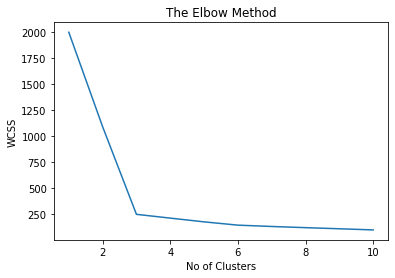

In [167]:
# Metode Elbow
score = []

for cluster in range(1,11):
    kmeans = KMeans(n_clusters = cluster)
    scaled_data = StandardScaler().fit_transform(x)
    kmeans.fit(scaled_data)
    score.append(kmeans.inertia_)

plt.plot(range(1,11), score)
plt.title('The Elbow Method')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.show()

Dari grafik diatas dapat diketahui bahwa 'Elbow' terjadi di k = 3

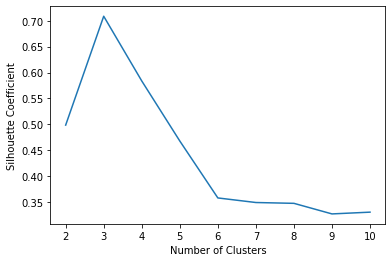

In [168]:
#Silhouette score
silhouette_coefficients = []
from sklearn.metrics import silhouette_score

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    scaled_data = StandardScaler().fit_transform(x)
    kmeans.fit(scaled_data)
    score = silhouette_score(scaled_data, kmeans.labels_)
    silhouette_coefficients.append(score)
    
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

Dari grafik diatas dapat diketahui bahwa nilai Silhouette terdapat di k = 3 dan 6. Dari sini dapat diambil kesimupulan 'Elbow' terjadi di k = 3. Sedangkan, nilai Silhouette terjadi di k = 3 dan k = 6. Maka kita asumsikan bahwa k = 3 untuk ideal dalam k-Means.

In [169]:
kmeans_final = KMeans(n_clusters = 3)
data['cluster'] = kmeans_final.fit_predict(x)
data['cluster'] = data['cluster'].astype('category')

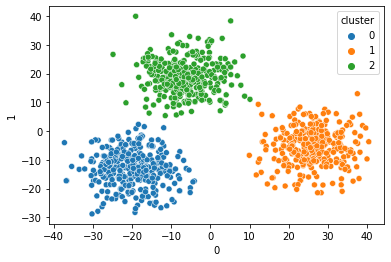

In [170]:
sns.scatterplot(data = data, x = '0', y = '1', hue = 'cluster')
plt.show()

Dapat dilihat bahwa dari data tersebut terbagi menjadi 3 cluster.
Dan berdasarkan Elbow dan Silhouette method nilai k yang terbaik adalah 3.